In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

To classify the XOR function correctly we only need one hidden layer with just 2 hidden units, and one sigmoid output unit.
Visually, we need two lines to first seperate each purrple (or yellow) point from the rest, and then one more perceptron on the output layer.  
The model in heavily dependent on the initial values of the weights and bias, since for 0 initialization moset likely the NN will get stuck.

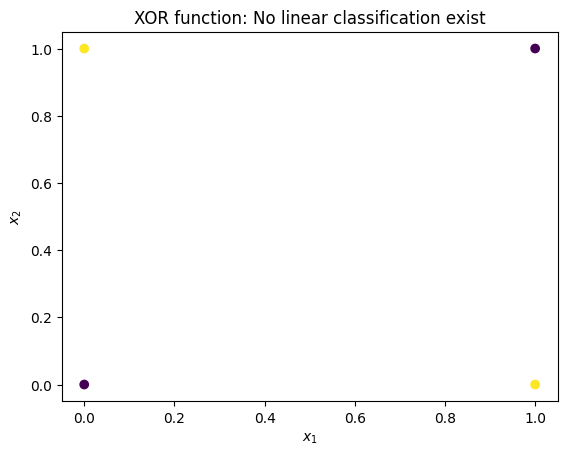

In [2]:
y = np.array([[0], [1], [1], [0]])
x = np.array([[0,0], [0,1], [1,0], [1,1]])

plt.scatter(x[:,0], x[:, 1], c = y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('XOR function: No linear classification exist')
# plt.legend()
plt.show()

In [ ]:
# the model is heavily dependent on the choice of the initilized weights and bias

model = keras.Sequential()
model.add(keras.Input(shape= (2,)))
model.add(keras.layers.Dense(2, activation='sigmoid', 
                             kernel_initializer= keras.initializers.RandomUniform(minval=0.5, maxval=1.5),
                             bias_initializer = keras.initializers.RandomUniform(minval=-1.5, maxval=-0.5), 
                             name = 'hidden_layer'))
model.add(keras.layers.Dense(1, activation='sigmoid', name = 'outpur_layer'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outpur_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train the model
model.fit(x, y, epochs=1000, )

Epoch 1/1000


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - binary_accuracy: 0.7500 - loss: 0.6928
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - binary_accuracy: 0.7500 - loss: 0.6927
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - binary_accuracy: 0.7500 - loss: 0.6927
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - binary_accuracy: 0.5000 - loss: 0.6927
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - binary_accuracy: 0.5000 - loss: 0.6927
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - binary_accuracy: 0.5000 - loss: 0.6927
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - binary_accuracy: 0.5000 - loss: 0.6926
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - binary_accuracy: 0.5000 - loss: 0.6926
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - binary_accuracy: 0.5000 - loss: 0.6926
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - binary_accuracy: 0.5000 - loss: 0.6926
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - binary_accuracy: 0.5000 - loss: 0.6926
E

In [82]:
loss, accuracy = model.evaluate(x, y, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

predictions = model.predict(x, verbose=0)
print(f"Predictions: {np.round(predictions.reshape(-1), 3)}")
print(f'Binary Predictions: {np.round(predictions.reshape(-1))}')

Loss: 0.5730, Accuracy: 1.0000
Predictions: [0.439 0.555 0.574 0.435]
Binary Predictions: [0. 1. 1. 0.]


In [68]:
hidden_layer, output_layer = model.layers
w_output, b_output = output_layer.get_weights()
w_hidden, b_hidden = hidden_layer.get_weights()

In [69]:
def line(w1, w2, b):
    x = np.arange(0, 1.1, 0.1)
    y = -w1*x/w2 - b/w2
    return x, y

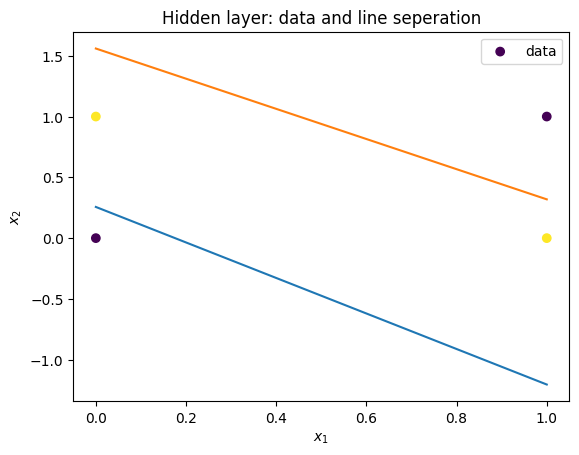

In [70]:
for w, b in zip(w_hidden, b_hidden):
    x_in, y_in = line(w[0], w[1], b)
    plt.plot(x_in, y_in)
plt.scatter(x[:, 0], x[:, 1], c = y, label = 'data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Hidden layer: data and line seperation')
plt.legend()
plt.show()

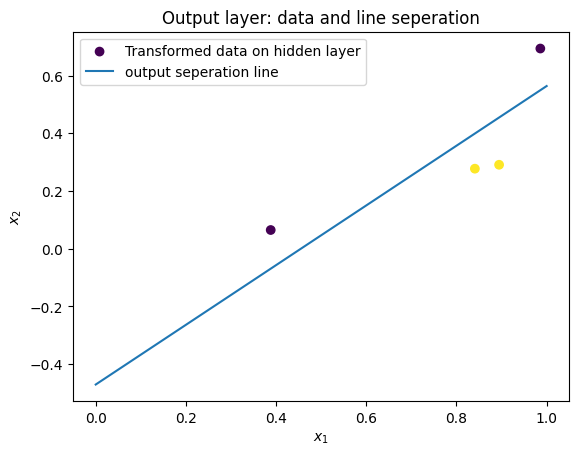

In [ ]:
x_hidden = hidden_layer(x)
x_out, y_out = line(w_output[0], w_output[1], b_output) 
plt.scatter(x_hidden[:, 0], x_hidden[:, 1], c = y, label = 'Output data of hidden layer')
plt.plot(x_out, y_out, label = 'output seperation line')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Output layer: data and line seperation')
plt.legend()
plt.show()